<a href="https://colab.research.google.com/github/IvanUlloa098/simulacion/blob/main/tarea_7/ejercicio_IntroduccionProbabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica Introducción a la Probabilidad
## Iván Ulloa

In [ ]:
from google.colab import files
import numpy as np
from scipy import stats
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
archivo_fifa = files.upload()

Saving fifa_datos.csv to fifa_datos.csv


In [ ]:
fifa = pd.read_csv(io.StringIO(archivo_fifa['fifa_datos.csv'].decode('utf-8')))

del fifa["Name"]
del fifa["Unnamed: 0"]
del fifa["Photo"]
del fifa["Flag"]
del fifa["Club Logo"]

fifa["Release Clause"] = fifa["Release Clause"].str.replace("€","")
fifa["Release Clause"] = fifa["Release Clause"].str.replace("M","")
fifa["Release Clause"] = fifa["Release Clause"].apply(pd.to_numeric, errors='coerce')

fifa["Value"] = fifa["Value"].str.replace("€","")
fifa["Value"] = fifa["Value"].str.replace("M","")
fifa["Value"] = fifa["Value"].apply(pd.to_numeric, errors='coerce')

fifa["Wage"] = fifa["Wage"].str.replace("€","")
fifa["Wage"] = fifa["Wage"].str.replace("K","")
fifa["Wage"] = fifa["Wage"].apply(pd.to_numeric, errors='coerce')

fifa.head(5)

,ID,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,Argentina,94,94,FC Barcelona,110.5,565,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,20801,33,Portugal,94,94,Juventus,77.0,405,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,190871,26,Brazil,92,93,Paris Saint-Germain,118.5,290,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,193080,27,Spain,91,93,Manchester United,72.0,260,1471,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,192985,27,Belgium,91,92,Manchester City,102.0,355,2281,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4


In [ ]:
fifa.describe()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,7099.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,9150.000000
mean,214298.338606,25.122206,66.238699,71.307299,5.508565,9.731312,1597.809908,1.113222,2.947299,2.361308,...,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,7.932656
std,29965.244204,4.669943,6.908930,6.136496,8.028353,21.999290,272.586016,0.394031,0.660456,0.756164,...,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,14.139536
min,16.000000,16.000000,46.000000,48.000000,0.000000,0.000000,731.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.400000,1.000000,1457.000000,1.000000,3.000000,2.000000,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.500000
50%,221759.000000,25.000000,66.000000,71.000000,3.000000,3.000000,1635.000000,1.000000,3.000000,2.000000,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,2.900000
75%,236529.500000,28.000000,71.000000,75.000000,6.500000,9.000000,1787.000000,1.000000,3.000000,3.000000,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,8.400000
max,246620.000000,45.000000,94.000000,95.000000,118.500000,565.000000,2346.000000,5.000000,5.000000,5.000000,...,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,228.100000


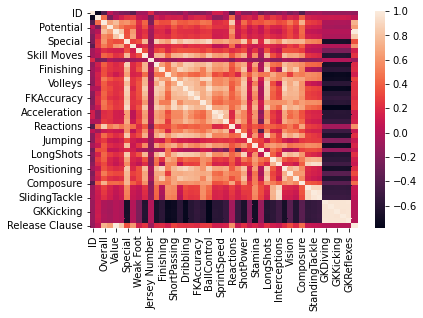

In [ ]:
sns.heatmap(fifa.corr())

In [ ]:
archivo_ranking = files.upload()

Saving ranking.csv to ranking.csv


In [ ]:
rank = pd.read_csv(io.StringIO(archivo_ranking['ranking.csv'].decode('utf-8')))

rank.drop('NUEVO\nGE', inplace=True, axis=1)
rank.drop('\nNombre Grupo Económico', inplace=True, axis=1)

rank["Impuesto Causado ISD 2019"] = rank["Impuesto Causado ISD 2019"].str.replace(",","")
rank["Impuesto Causado IAE 2020 (5)"] = rank["Impuesto Causado IAE 2020 (5)"].str.replace(",","")
rank["Impuesto Causado IAE 2019 (5)"] = rank["Impuesto Causado IAE 2019 (5)"].str.replace(",","")
rank["Total Activo \n(6) 2020"] = rank["Total Activo \n(6) 2020"].str.replace(",","")
rank["Total Activo \n(6) 2019"] = rank["Total Activo \n(6) 2019"].str.replace(",","")
rank["Total Patrimonio (7) 2020"] = rank["Total Patrimonio (7) 2020"].str.replace(",","")
rank["Total Patrimonio \n(7) 2019"] = rank["Total Patrimonio \n(7) 2019"].str.replace(",","")
rank["\nTotal Recaudado (8) 2020"] = rank["\nTotal Recaudado (8) 2020"].str.replace(",","")
rank["\nTotal Recaudado (8) 2019"] = rank["\nTotal Recaudado (8) 2019"].str.replace(",","")
rank["\nTotal Deuda Generada \n(9)"] = rank["\nTotal Deuda Generada \n(9)"].replace(",","")

rank["Impuesto Causado ISD 2019"] = rank["Impuesto Causado ISD 2019"].apply(pd.to_numeric, errors='coerce')
rank["Impuesto Causado IAE 2020 (5)"] = rank["Impuesto Causado IAE 2020 (5)"].apply(pd.to_numeric, errors='coerce')
rank["Impuesto Causado IAE 2019 (5)"] = rank["Impuesto Causado IAE 2019 (5)"].apply(pd.to_numeric, errors='coerce')
rank["Total Activo \n(6) 2020"] = rank["Total Activo \n(6) 2020"].apply(pd.to_numeric, errors='coerce')
rank["Total Activo \n(6) 2019"] = rank["Total Activo \n(6) 2019"].apply(pd.to_numeric, errors='coerce')
rank["Total Patrimonio (7) 2020"] = rank["Total Patrimonio (7) 2020"].apply(pd.to_numeric, errors='coerce')
rank["Total Patrimonio \n(7) 2019"] = rank["Total Patrimonio \n(7) 2019"].apply(pd.to_numeric, errors='coerce')
rank["\nTotal Recaudado (8) 2020"] = rank["\nTotal Recaudado (8) 2020"].apply(pd.to_numeric, errors='coerce')
rank["\nTotal Recaudado (8) 2019"] = rank["\nTotal Recaudado (8) 2019"].apply(pd.to_numeric, errors='coerce')
rank["\nTotal Deuda Generada \n(9)"] = rank["\nTotal Deuda Generada \n(9)"].apply(pd.to_numeric, errors='coerce')

rank['\nTotal Deuda Generada \n(9)'] = rank['\nTotal Deuda Generada \n(9)'].fillna(0)

rank.head(5)

,Ranking \n(1) Tamaño 2021,Ranking \n(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,Reporta sus BENEFICIARIOS EFECTIVOS \n(*),No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas \nNaturales (a),Personas \nExtranjeras (b),Sociedades \nNacionales (c),Sociedades \nExtranjeras (d),...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
0,1,1,0,PARCIALMENTE,2,0,3,1,120,13,...,221893,3509949,3577970,18949015666,17928760492,3688293052,3699748891,588975950,667872172,0.0
1,2,2,0,PARCIALMENTE,45,42,17,19,328,129,...,4339679,796827,945874,6417335168,6436090837,1878733441,1955377497,127087663,190328750,0.0
2,3,3,0,PARCIALMENTE,4,5,20,3,111,28,...,1617778,0,0,3448646302,3343835273,2427005282,2314556018,144524011,139310219,0.0
3,4,5,1,SI,2,0,9,0,57,2,...,86918,4785739,5678838,6014463154,5334073117,784042300,791999072,206200661,234359513,0.0
4,5,4,-1,NO,8,0,0,0,17,28,...,237591,0,0,3286786210,3616608480,2426480097,2305837270,202204211,152342627,0.0


In [ ]:
rank.describe()

,Ranking \n(1) Tamaño 2021,Ranking \n(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas \nNaturales (a),Personas \nExtranjeras (b),Sociedades \nNacionales (c),Sociedades \nExtranjeras (d),Contribuyentes\n Especiales,...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,302.0
mean,151.500000,151.500000,0.000000,1.506623,1.311258,3.546358,1.112583,19.837748,5.549669,3.705298,...,2.044879e+05,7.585266e+04,7.262930e+04,4.347356e+08,4.258298e+08,1.576028e+08,1.542798e+08,1.827717e+07,2.027815e+07,0.0
std,87.324109,87.324109,14.639182,4.200730,4.555578,4.225713,2.945898,26.866660,11.436486,5.121375,...,5.204052e+05,6.660274e+05,5.962780e+05,1.324460e+09,1.261576e+09,3.428475e+08,3.389915e+08,5.312978e+07,5.759129e+07,0.0
min,1.000000,1.000000,-85.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,5.258247e+06,5.761201e+06,-2.462531e+07,-5.790622e+06,2.530000e+02,2.630000e+02,0.0
25%,76.250000,76.250000,-5.750000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,...,4.772500e+02,0.000000e+00,0.000000e+00,6.270757e+07,6.581446e+07,2.516836e+07,2.355762e+07,1.697240e+06,2.067543e+06,0.0
50%,151.500000,151.500000,1.000000,0.000000,0.000000,2.000000,0.000000,12.500000,2.000000,2.000000,...,1.636700e+04,0.000000e+00,0.000000e+00,1.366815e+08,1.439221e+08,5.478062e+07,5.337896e+07,5.080476e+06,6.081486e+06,0.0
75%,226.750000,226.750000,7.750000,1.000000,0.000000,5.000000,1.000000,23.750000,6.000000,4.000000,...,1.116970e+05,0.000000e+00,0.000000e+00,3.528579e+08,3.479469e+08,1.504091e+08,1.485321e+08,1.125920e+07,1.471770e+07,0.0
max,302.000000,302.000000,49.000000,45.000000,42.000000,23.000000,28.000000,328.000000,129.000000,71.000000,...,4.339679e+06,9.817255e+06,7.702248e+06,1.894902e+10,1.792876e+10,3.688293e+09,3.699749e+09,5.889760e+08,6.678722e+08,0.0


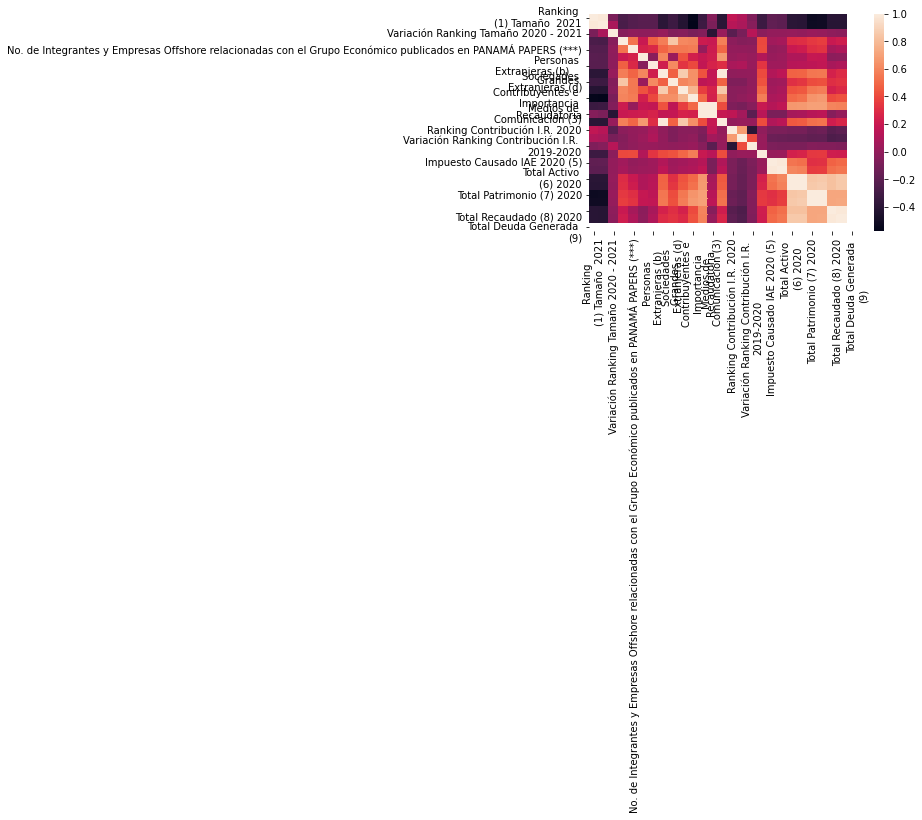

In [ ]:
sns.heatmap(rank.corr())

## Conclusiones

La descipción de los datos brinda información importante que puede ser obtenida con operaciones relativamente sencillas, pero con gran valor en ciertos casos como en el dataset de la FIFA que tenemos que existen rankings increiblemente bajos. Otro método utilizado para describir las relaciones entre variables son las correlaciones que pueden ser visualizadas en un mapa de calor. 